In [2]:
from __future__ import division, print_function
import argparse
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

def initialize_centroids(num_clusters, image):
    """
    Randomly initialize centroids by selecting pixels from the image.

    Parameters:
        num_clusters (int): Number of clusters/centroids.
        image (numpy.ndarray): Input image of shape (H, W, C).

    Returns:
        numpy.ndarray: Initialized centroids of shape (num_clusters, C).
    """
    candidates = image.reshape(-1, image.shape[-1])
    random_indices = np.random.choice(candidates.shape[0], num_clusters, replace=False)
    return candidates[random_indices]

def refine_centroids(centroids, image, max_iterations=30, convergence_tolerance=1e-5):
    """
    Refine centroids using the k-means clustering algorithm.

    Parameters:
        centroids (numpy.ndarray): Initial centroids of shape (K, C).
        image (numpy.ndarray): Input image of shape (H, W, C).
        max_iterations (int): Maximum number of iterations for refinement.
        convergence_tolerance (float): Tolerance for convergence.

    Returns:
        numpy.ndarray: Refined centroids of shape (K, C).
    """
    pixels = image.reshape(-1, image.shape[-1])

    for _ in range(max_iterations):
        
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
        closest = np.argmin(distances, axis=1)

        new_centroids = np.array([
            pixels[closest == k].mean(axis=0) if len(pixels[closest == k]) > 0 else centroids[k]
            for k in range(centroids.shape[0])
        ])

        
        if np.allclose(centroids, new_centroids, atol=convergence_tolerance):
            break

        centroids = new_centroids

    return centroids

def compress_image(image, centroids):
    """
    Compress the image by mapping each pixel to the nearest centroid.

    Parameters:
        image (numpy.ndarray): Input image of shape (H, W, C).
        centroids (numpy.ndarray): Centroids of shape (K, C).

    Returns:
        numpy.ndarray: Compressed image of shape (H, W, C).
    """
    pixels = image.reshape(-1, image.shape[-1])
    distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
    closest = np.argmin(distances, axis=1)
    compressed_pixels = centroids[closest]
    return compressed_pixels.reshape(image.shape)

def main(arguments):
    """
    Main function to perform image compression using k-means clustering.
    """

    small_image = imread(arguments.small_path)
    large_image = imread(arguments.large_path)
    centroids = initialize_centroids(arguments.num_clusters, small_image)
    centroids = refine_centroids(centroids, small_image, max_iterations=arguments.max_iter)
    compressed_image = compress_image(large_image, centroids)

    plt.figure()
    plt.title('Original Image')
    plt.imshow(large_image)
    plt.axis('off')

    plt.figure()
    plt.title('Compressed Image')
    plt.imshow(compressed_image.astype(np.uint8))
    plt.axis('off')

    plt.imsave('compressed_image_large.png', compressed_image.astype(np.uint8))
    plt.show()




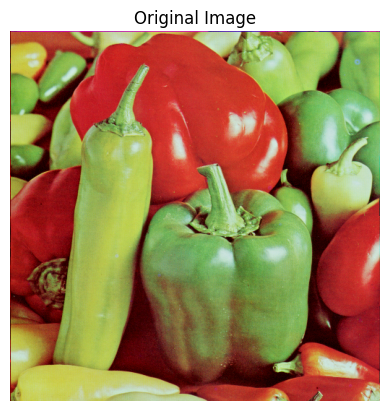

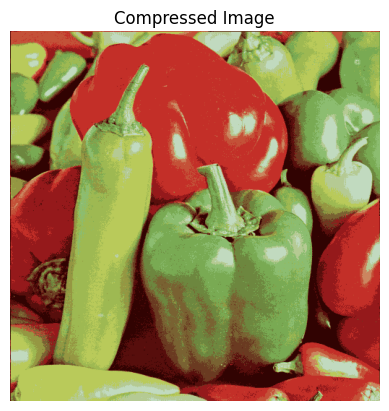

In [3]:
if __name__ == '__main__':
    import sys
    if 'ipykernel' in sys.modules:
        # Running in a Jupyter notebook or interactive environment
        class Args:
            small_path = './peppers-small.tiff'
            large_path = './peppers-large.tiff'
            max_iter = 150
            num_clusters = 16
            print_every = 10
        args = Args()
    else:
        # Running as a standalone script
        parser = argparse.ArgumentParser(description="Image Compression using k-means clustering.")
        parser.add_argument('--small_path', type=str, default='./peppers-small.tiff', help='Path to small image.')
        parser.add_argument('--large_path', type=str, default='./peppers-large.tiff', help='Path to large image.')
        parser.add_argument('--num_clusters', type=int, default=16, help='Number of clusters/centroids.')
        parser.add_argument('--max_iter', type=int, default=150, help='Maximum number of iterations for k-means.')
        parser.add_argument('--print_every', type=int, default=10, help='Frequency of status updates.')
        args = parser.parse_args()

    main(args)
